<a href="https://colab.research.google.com/github/kikiru328/LiveStock_Spark/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import os
from glob import glob
import json
from tqdm import tqdm

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import cv2

In [121]:
json_path = '/content/drive/MyDrive/Innopolis_spark/data/train/label/소_bbox'
labels = glob(json_path + '/*.json')
print(labels[0])

imgs = '/content/drive/MyDrive/Innopolis_spark/data/train/img/소_bbox/livestock_cow_bbox_012159.jpg'
print(imgs)

/content/drive/MyDrive/Innopolis_spark/data/train/label/소_bbox/livestock_cow_bbox_012159.json
/content/drive/MyDrive/Innopolis_spark/data/train/img/소_bbox/livestock_cow_bbox_012159.jpg


In [5]:
with open(labels[0],'r') as json_file:
    test_j = json.load(json_file)

In [6]:
len(test_j['label_info']['annotations'])
test_j['label_info']['annotations']

[{'bbox': [1143, 486, 1319, 681], 'category_id': 1},
 {'bbox': [1241, 372, 1455, 541], 'category_id': 1},
 {'bbox': [1694, 484, 1911, 673], 'category_id': 1},
 {'bbox': [621, 418, 894, 595], 'category_id': 1},
 {'bbox': [528, 431, 653, 629], 'category_id': 1}]

In [7]:
bboxs = []
for i in tqdm(range(len(test_j['label_info']['annotations']))):
    bboxs.append(test_j['label_info']['annotations'][i]['bbox'])
    

100%|██████████| 5/5 [00:00<00:00, 54189.97it/s]


In [8]:
bboxs

[[1143, 486, 1319, 681],
 [1241, 372, 1455, 541],
 [1694, 484, 1911, 673],
 [621, 418, 894, 595],
 [528, 431, 653, 629]]

In [147]:
L = [labels[0]]
I = [imgs]

In [155]:
def rv_background(image,label):
    for im,lab in tqdm(zip(image, label)):

        img_ = cv2.imread(im)
        img = cv2.cvtColor(img_, cv2.COLOR_BGR2RGB)

        zero_img = np.zeros((img.shape[:2]),np.uint8)
        with open(lab,'r') as json_file:
            test_j = json.load(json_file)
            coords = test_j['label_info']['annotations']
            Bbox = []
            for i in range(len(coords)):
                Bbox.append(coords[i]['bbox'])

        for i in range(len(Bbox)):
            f_point = Bbox[i][0], Bbox[i][1]
            s_point = Bbox[i][2], Bbox[i][3]
            mask = cv2.rectangle(zero_img, f_point, s_point, (255,0,0) ,-1)

        result = cv2.bitwise_and(img,img,mask=mask)
        return result

0it [00:00, ?it/s]


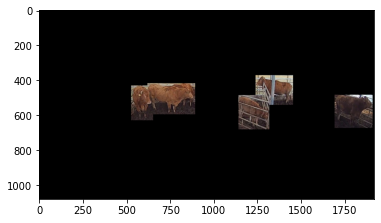

In [206]:
plt.imshow(rv_background(I,L))

In [204]:
def extraction_crop(image,label,folder,animal):
    for im,lab in tqdm(zip(image,label)):
        img = Image.open(im)

    with open(lab,'r') as json_file:
        test_j = json.load(json_file)
        coords = test_j['label_info']['annotations']
        Bbox = []
        for i in range(len(coords)):
            Bbox.append(coords[i]['bbox'])

    for i in range(len(Bbox)):
        crop_img = img.crop((Bbox[i][0],Bbox[i][1],Bbox[i][2],Bbox[i][3]))
        crop_img.save(f'{folder}/{animal}/{i}.jpg')

    return crop_img


1it [00:00, 382.03it/s]


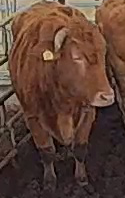

In [205]:
extraction_crop(I,L,'/content/train','cow')

In [231]:
train_imgs = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/images')
test_imgs = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/test/images')
val_imgs = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/val/images')

In [250]:
train_labels = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/train/labels')
test_labels = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/test/labels')
val_labels = os.listdir('/content/drive/MyDrive/Innopolis_spark/chl/train/data/val/labels')

In [254]:
org_train_pig_label = glob('/content/drive/MyDrive/Innopolis_spark/data/train/label/돼지_bbox/*.json')
org_train_cow_label = glob('/content/drive/MyDrive/Innopolis_spark/data/train/label/소_bbox/*.json')

org_val_pig_label = glob('/content/drive/MyDrive/Innopolis_spark/data/val/label/돼지_bbox/*.json')
org_val_cow_label = glob('/content/drive/MyDrive/Innopolis_spark/data/val/label/소_bbox/*.json')

In [253]:
train_labels_json = []
test_labels_json = []
val_labels_json = []
for i in tqdm(train_labels):
    train_labels_json.append(i.replace('txt','json'))

for i in tqdm(test_labels):
    test_labels_json.append(i.replace('txt','json'))
    
for i in tqdm(val_labels):
    val_labels_json.append(i.replace('txt','json'))


100%|██████████| 13163/13163 [00:00<00:00, 732300.82it/s]

100%|██████████| 2058/2058 [00:00<00:00, 774298.32it/s]

100%|██████████| 3291/3291 [00:00<00:00, 664778.20it/s]


In [ ]:
train = []
test = []
val = []
error = []

total = [org_train_pig_label,org_train_cow_label,org_val_pig_label,org_val_cow_label]
for folder in tqdm(total):
    for i in folder:
        try:
            A = i.replace('json','txt')
            if A in train_labels:
                train.append(i)
            elif A in test_labels:
                test.append(i)
            else:
                val.append(i)
        except Exception as e:
            print(e)
            error.append(i)

In [256]:
org_train_pig_label[0]

'/content/drive/MyDrive/Innopolis_spark/data/train/label/돼지_bbox/livestock_pig_bbox_000001.json'

In [257]:
train_labels_json[0]

'livestock_cow_bbox_010243.json'

In [258]:
tr = []
if 'cow' in train_labels_json[0]:
    print('cow')
else:
    print('no')

cow


In [260]:
if '돼지' in org_train_pig_label[0]:
    print('돼지')
else:
    print('no')

돼지


In [ ]:
for i in folder:
    try:
        if i in org_train_pig_label:
            